In [1]:
import Pkg
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("Dates")
Pkg.add("Missings")
Pkg.add("GLM");
Pkg.add("Pipe");
Pkg.add("Plots");
Pkg.add("Statistics");
Pkg.add("StatsPlots")
Pkg.add("ShiftedArrays")
Pkg.add("RollingFunctions")


   Updating registry at `/opt/julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching:

    Fetching: [===============>                         

    Fetching: [

    Fetching: [==============================>          

    Fetching: [

Fetching: [========================================>]  100.0 %

  Resolving package versions...
  Installed SortingAlgorithms ─────────── v0.3.1
  Installed PooledArrays ──────────────── v0.5.3
  Installed InvertedIndices ───────────── v1.0.0
  Installed WeakRefStrings ────────────── v0.6.2
  Installed Compat ────────────────────── v3.12.0
  Installed Tables ────────────────────── v1.0.4
  Installed CategoricalArrays ─────────── v0.8.1
  Installed DataAPI ───────────────────── v1.3.0
  Installed IteratorInterfaceExtensions ─ v1.0.0
  Installed Reexport ──────────────────── v0.2.0
  Installed TableTraits ───────────────── v1.0.0
  Installed DataStructures ────────────── v0.17.18
  Installed Missings ──────────────────── v0.4.3
  Installed OrderedCollections ────────── v1.2.0
  Installed DataValueInterfaces ───────── v1.0.0
  Installed FilePathsBase ─────────────── v0.8.0
  Installed DataFrames ────────────────── v0.21.2
  Installed CSV ───────────────────────── v0.6.2
   Updating `/opt/julia/environments/v1.4/Project.toml`
  [336ed68f] + CSV v0.6.2


  Installed IniFile ─────────── v0.5.0
  Installed Contour ─────────── v0.5.3
  Installed GeometryTypes ───── v0.8.3
  Installed FreeType2_jll ───── v2.10.1+2
  Installed x265_jll ────────── v3.0.0+1
  Installed LAME_jll ────────── v3.100.0+1
  Installed ColorSchemes ────── v3.9.0
######################################################################### 100.0%
######################################################################### 100.0%
######################################################################### 100.0%
######################################################################### 100.0%
######################################################################### 100.0%
######################################################################### 100.0%
######################################################################### 100.0%
######################################################################### 100.0%
######################################################################

  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
  [1277b4bf] + ShiftedArrays v1.0.0
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
  Installed RollingFunctions ─ v0.6.2
   Updating `/opt/julia/environments/v1.4/Project.toml`
  [b0e4dd01] + RollingFunctions v0.6.2
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
  [b0e4dd01] + RollingFunctions v0.6.2


In [2]:
using Plots
ENV["COLUMNS"] = 300
ENV["LINES"] = 4
ENV["JULIA_NUM_THREADS"]

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


"4"

In [6]:
using DataFrames, Dates, Pipe, Statistics, ShiftedArrays

date_rng = collect(Date(2018, 1, 1):Dates.Day(1):Date(2020, 12, 31))
n_days = length(date_rng)

grps = ["ABC", "DEF"]

grp_list = [
    DataFrame(:date => date_rng, :grp => g, :a => rand(n_days), :b => rand(n_days))
        for g in grps
]

df = vcat(grp_list...);

show(df)

2192×4 DataFrame
│ Row  │ date       │ grp    │ a         │ b        │
│      │ Date       │ String │ Float64   │ Float64  │
├──────┼────────────┼────────┼───────────┼──────────┤
│ 1    │ 2018-01-01 │ ABC    │ 0.811172  │ 0.98643  │
│ 2    │ 2018-01-02 │ ABC    │ 0.43171   │ 0.339937 │
│ 3    │ 2018-01-03 │ ABC    │ 0.778942  │ 0.353217 │
│ 4    │ 2018-01-04 │ ABC    │ 0.885981  │ 0.147961 │
│ 5    │ 2018-01-05 │ ABC    │ 0.0942746 │ 0.555094 │
│ 6    │ 2018-01-06 │ ABC    │ 0.605254  │ 0.317861 │
│ 7    │ 2018-01-07 │ ABC    │ 0.787773  │ 0.685235 │
│ 8    │ 2018-01-08 │ ABC    │ 0.798803  │ 0.605185 │
│ 9    │ 2018-01-09 │ ABC    │ 0.36749   │ 0.150256 │
│ 10   │ 2018-01-10 │ ABC    │ 0.908235  │ 0.983925 │
⋮
│ 2182 │ 2020-12-21 │ DEF    │ 0.957481  │ 0.774929 │
│ 2183 │ 2020-12-22 │ DEF    │ 0.899818  │ 0.390071 │
│ 2184 │ 2020-12-23 │ DEF    │ 0.111117  │ 0.630436 │
│ 2185 │ 2020-12-24 │ DEF    │ 0.476385  │ 0.421506 │
│ 2186 │ 2020-12-25 │ DEF    │ 0.138879  │ 0.359592 │
│ 2187 │ 

This might be slow. I am re-doing the groupby each time.
If the number of groups is >> the number of lags and cols, maybe it makes more sense to loop over the groups. Not sure how to do that.

In [7]:
cols = [:a, :b]
lags = [5, 20]

# all combinations of lags and columns
lags_and_cols = [collect(Iterators.product(cols, lags))...]

for (col, period) in lags_and_cols
    df = @pipe df |>
        groupby(_, :grp) |>
        transform(_, col => (x-> lag(x, period)) => Symbol(col, "_lag_", period))
end

# Multithreading

8036×4 DataFrame
│ Row  │ date       │ grp    │ a         │ b           │
│      │ Date       │ String │ Float64   │ Float64     │
├──────┼────────────┼────────┼───────────┼─────────────┤
│ 1    │ 2010-01-01 │ ABC    │ 0.565239  │ 0.798968    │
│ 2    │ 2010-01-02 │ ABC    │ 0.034584  │ 0.665212    │
│ 3    │ 2010-01-03 │ ABC    │ 0.583496  │ 0.766216    │
│ 4    │ 2010-01-04 │ ABC    │ 0.172276  │ 0.735953    │
│ 5    │ 2010-01-05 │ ABC    │ 0.290151  │ 0.978365    │
│ 6    │ 2010-01-06 │ ABC    │ 0.0759326 │ 0.39615     │
│ 7    │ 2010-01-07 │ ABC    │ 0.213633  │ 0.670108    │
│ 8    │ 2010-01-08 │ ABC    │ 0.206245  │ 0.671502    │
│ 9    │ 2010-01-09 │ ABC    │ 0.672327  │ 0.819535    │
│ 10   │ 2010-01-10 │ ABC    │ 0.901704  │ 0.994644    │
⋮
│ 8026 │ 2020-12-21 │ DEF    │ 0.0310116 │ 0.978735    │
│ 8027 │ 2020-12-22 │ DEF    │ 0.446366  │ 0.26563     │
│ 8028 │ 2020-12-23 │ DEF    │ 0.699817  │ 0.000757713 │
│ 8029 │ 2020-12-24 │ DEF    │ 0.766395  │ 0.252511    │
│ 8030 │ 202

In [10]:
function expensive(x)
    println("called")
    sleep(5)
    return x
end

expensive (generic function with 1 method)

In [11]:
@time begin
    for i in 1:3
        expensive(10)
    end
end

called
called
called
 15.004814 seconds (867 allocations: 39.812 KiB)


In [12]:
@time begin
    @threads for i in 1:3
        expensive(10)
    end
end

called
called
called
  5.025636 seconds (23.98 k allocations: 1.181 MiB)


In [15]:
using DataFrames, Dates, Pipe, RollingFunctions
import Base.Threads.@threads

date_rng = collect(Date(2010, 1, 1):Dates.Day(1):Date(2020, 12, 31))
n_days = length(date_rng)

grps = ["ABC", "DEF"]

grp_list = [
    DataFrame(:date => date_rng, :grp => g, :a => rand(n_days), :b => rand(n_days))
        for g in grps
]

df = vcat(grp_list...);

# show(df)

In [16]:
cols = [:a, :b]

new_cols = Vector{Any}(undef, length(cols))
col_names_vector = Vector{Symbol}(undef, length(cols))

gdf = groupby(df, :grp)

@time begin
@threads for i in 1:length(cols)
#for i in 1:length(cols)
    println(i)
    c = cols[i]
    new_name = Symbol(c, "_runmean")
    
     new_cols[i] = @pipe gdf |>
              transform(_, c => (x-> runmean(x, 10)) => new_name) |>
              _[!, new_name]   # get a view on the column; no copy

#     new_cols[i] = @pipe gdf |>
#              transform(_, c => (x-> expensive(x)) => new_name) |>
#              _[!, new_name]   # get a view on the column; no copy
        
    col_names_vector[i] = new_name
end
end

# hcat makes copies; use insercols instead and force no copy
insertcols!(df, (col_names_vector .=> new_cols)..., copycols=false)

#show(df)

1
2
  0.629679 seconds (1.62 M allocations: 80.551 MiB, 4.98% gc time)


,date,grp,a,b,a_runmean,b_runmean
,Date,String,Float64,Float64,Float64,Float64
1,2010-01-01,ABC,0.41397,0.0788381,0.41397,0.0788381
2,2010-01-02,ABC,0.89691,0.888557,0.65544,0.483697
3,2010-01-03,ABC,0.866083,0.813507,0.725654,0.593634
4,2010-01-04,ABC,0.158482,0.898005,0.583861,0.669727
⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [17]:
show(col_names_vector)

[:a_runmean, :b_runmean]

In [18]:
using DataFrames, Pipe
import Base.Threads.@threads

function expensive(x)
    sleep(5)
    return x
end

df = DataFrame(:a=>[1,2,3,4], :b=>[6,7,8,9], :grp=>["A", "A", "B", "B"])
cols = [:a, :b]

gdf = groupby(df, :grp)

new_cols = Vector{Any}(undef, length(cols))
col_names_vector = Vector{Symbol}(undef, length(cols))

@time begin
    @threads for i in 1:length(cols)
        c = cols[i]
        new_name = Symbol(c, "_expensive")
        new_cols[i] = @pipe gdf |>
            transform(_, c => (x->expensive(x)) => new_name) |>
            _[!, new_name]
        col_names_vector[i] = new_name
    end
end

insertcols!(df, (col_names_vector .=> new_cols)..., copycols=false)


 10.650502 seconds (1.20 M allocations: 62.077 MiB, 0.19% gc time)


,a,b,grp,a_expensive,b_expensive
,Int64,Int64,String,Int64,Int64
1,1,6,A,1,6
2,2,7,A,2,7
3,3,8,B,3,8
4,4,9,B,4,9


In [197]:
# cols = [:a, :b]
# new_cols = []

# gdf = groupby(df, :grp)

# @threads for c in cols
#     push!(new_cols,
#         @pipe gdf |>
#             transform(_, c => (x-> runmean(x, 10)) => Symbol(c, "_runmean")) |>
#             select(_, Symbol(c, "_runmean"))
#     )
# end

# df = hcat(df, new_cols...)   # hcat copies

# show(df)

In [119]:
hcat(df, new_cols...)

,date,grp,a,b,a_runmean,b_runmean
,Date,String,Float64,Float64,Float64,Float64
1,2010-01-01,ABC,0.711581,0.695283,0.711581,0.695283
2,2010-01-02,ABC,0.0562659,0.085953,0.383923,0.390618
3,2010-01-03,ABC,0.491642,0.14008,0.41983,0.307105
4,2010-01-04,ABC,0.157893,0.0880704,0.354346,0.252347
⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [105]:
[names(new_cols[i])[1] for i in 1:length(new_cols)]

2-element Array{String,1}: …

In [99]:
for i in 1:2
    println(names(new_cols[i])[1])
end

a_runmean
b_runmean


In [64]:
show(new_cols[1])

8036×1 DataFrame
│ Row  │ b_runmean │
│      │ Float64   │
├──────┼───────────┤
│ 1    │ 0.175692  │
│ 2    │ 0.38669   │
│ 3    │ 0.557638  │
│ 4    │ 0.511125  │
│ 5    │ 0.547293  │
│ 6    │ 0.544682  │
│ 7    │ 0.482109  │
│ 8    │ 0.434565  │
│ 9    │ 0.401575  │
│ 10   │ 0.457696  │
⋮
│ 8026 │ 0.640574  │
│ 8027 │ 0.681364  │
│ 8028 │ 0.664624  │
│ 8029 │ 0.698447  │
│ 8030 │ 0.687917  │
│ 8031 │ 0.698431  │
│ 8032 │ 0.680282  │
│ 8033 │ 0.685133  │
│ 8034 │ 0.7115    │
│ 8035 │ 0.691873  │
│ 8036 │ 0.689288  │

In [56]:
show(df)

8036×4 DataFrame
│ Row  │ date       │ grp    │ a        │ b        │
│      │ Date       │ String │ Float64  │ Float64  │
├──────┼────────────┼────────┼──────────┼──────────┤
│ 1    │ 2010-01-01 │ ABC    │ 0.603299 │ 0.175692 │
│ 2    │ 2010-01-02 │ ABC    │ 0.268965 │ 0.597687 │
│ 3    │ 2010-01-03 │ ABC    │ 0.948789 │ 0.899536 │
│ 4    │ 2010-01-04 │ ABC    │ 0.295619 │ 0.371587 │
│ 5    │ 2010-01-05 │ ABC    │ 0.795563 │ 0.691964 │
│ 6    │ 2010-01-06 │ ABC    │ 0.423701 │ 0.531624 │
│ 7    │ 2010-01-07 │ ABC    │ 0.890909 │ 0.106674 │
│ 8    │ 2010-01-08 │ ABC    │ 0.640108 │ 0.101761 │
│ 9    │ 2010-01-09 │ ABC    │ 0.306673 │ 0.137653 │
│ 10   │ 2010-01-10 │ ABC    │ 0.178634 │ 0.962788 │
⋮
│ 8026 │ 2020-12-21 │ DEF    │ 0.918533 │ 0.949102 │
│ 8027 │ 2020-12-22 │ DEF    │ 0.45015  │ 0.983219 │
│ 8028 │ 2020-12-23 │ DEF    │ 0.295273 │ 0.395706 │
│ 8029 │ 2020-12-24 │ DEF    │ 0.30127  │ 0.736903 │
│ 8030 │ 2020-12-25 │ DEF    │ 0.12796  │ 0.867428 │
│ 8031 │ 2020-12-26 │ DEF  

In [11]:
@threads for i = 1:10
    println("i = $i on thread $(Threads.threadid())")
end

i = 1 on thread 1
i = 9 on thread 4
i = 2 on thread 1
i = 4 on thread 2
i = 7 on thread 3
i = 5 on thread 2
i = 10 on thread 4
i = 6 on thread 2
i = 3 on thread 1
i = 8 on thread 3


In [19]:
M = rand(100, 2)

100×2 Array{Float64,2}: …

In [21]:
using RollingFunctions

┌ Info: Precompiling RollingFunctions [b0e4dd01-7b14-53d8-9b45-175a3e362653]
└ @ Base loading.jl:1260


In [27]:
runmean(M[:, 1], 5)

100-element Array{Float64,1}: …

In [28]:
calcs = []
@threads for i in 1:2
    push!(calcs, runmean(M[:, i], 5))
end

In [46]:
@threads for c in cols
    @pipe df |>
        groupby(_, :grp) |>
        transform(_, c => (x-> runmean(x, 10)) => Symbol(c, "_runmean"))
end

In [36]:
show(calcs[2])

[0.8475999605392379, 0.5660850165906529, 0.40418421183146885, 0.5147559087844926, 0.564241006889676, 0.5844059245017347, 0.5599951559342992, 0.6240002773683594, 0.6225890221533205, 0.51653884533487, 0.3529360095098032, 0.3282742865147232, 0.2517611104573003, 0.2813230830048247, 0.32824109193049794, 0.48105013099436833, 0.6308388999219918, 0.7451380633773346, 0.6857071014166597, 0.6040338436523578, 0.48379104857628186, 0.3308494601832047, 0.3601423443026014, 0.3144286891880608, 0.4577958957176794, 0.5611634048076553, 0.6230347116025078, 0.5737988496335071, 0.5689944754708229, 0.5293582309878525, 0.47247540389110476, 0.516354338993598, 0.5481608819135231, 0.5992168630789374, 0.4844846639062803, 0.5029348577437357, 0.4140506947725398, 0.32602661238343195, 0.37091567841466494, 0.509898667447968, 0.5135407846079023, 0.6428165920678066, 0.748583591662806, 0.7096003548518446, 0.7073798145599637, 0.6224969699588183, 0.6588176673133582, 0.6227590898540196, 0.6748693321164465, 0.5430612296233376

In [47]:
df

,date,grp,a,b,a_runmean,b_runmean
,Date,String,Float64,Float64,Float64,Float64
1,2018-01-01,ABC,0.869091,0.539155,0.869091,0.539155
2,2018-01-02,ABC,0.99254,0.0503887,0.930815,0.294772
3,2018-01-03,ABC,0.188485,0.125777,0.683372,0.23844
4,2018-01-04,ABC,0.0166292,0.297909,0.516686,0.253307
⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [42]:
@threads for c in cols
    df[:, Symbol(c, "_runmean")] = runmean(df[:, c], 10)
end

In [69]:
# doesn't work

# cols = [:a, :b]
# lags = [5, 20]

# # all combinations of lags and columns
# lags_and_cols = vec(collect(Iterators.product(cols, lags)))
# gdf = groupby(df, :grp)

# for (col, period) in lags_and_cols
#     gdf = @pipe gdf |>
#         transform(_, col => x-> lag(x, period)) |>
#         rename(_, Symbol(col, "_function") => Symbol(col, "_lag_", period))
# end

# df

,grp,date,a,b,a_lag_5,b_lag_5,a_lag_20,b_lag_20
,String,Date,Float64,Float64,Float64?,Float64?,Float64?,Float64?
1,ABC,2018-01-01,0.232996,0.535749,missing,missing,missing,missing
2,ABC,2018-01-02,0.241444,0.236651,missing,missing,missing,missing
3,ABC,2018-01-03,0.646808,0.898532,missing,missing,missing,missing
4,ABC,2018-01-04,0.581392,0.690227,missing,missing,missing,missing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [64]:
show(first(df, 10), allcols=true)

10×8 DataFrame
│ Row │ grp    │ date       │ a         │ b        │ a_lag_5   │ b_lag_5  │
│     │ String │ Date       │ Float64   │ Float64  │ Float64?  │ Float64? │
├─────┼────────┼────────────┼───────────┼──────────┼───────────┼──────────┤
│ 1   │ ABC    │ 2018-01-01 │ 0.0153079 │ 0.746679 │ missing   │ missing  │
│ 2   │ ABC    │ 2018-01-02 │ 0.320544  │ 0.939942 │ missing   │ missing  │
│ 3   │ ABC    │ 2018-01-03 │ 0.196839  │ 0.928959 │ missing   │ missing  │
│ 4   │ ABC    │ 2018-01-04 │ 0.738421  │ 0.460788 │ missing   │ missing  │
│ 5   │ ABC    │ 2018-01-05 │ 0.448885  │ 0.545115 │ missing   │ missing  │
│ 6   │ ABC    │ 2018-01-06 │ 0.879183  │ 0.720746 │ 0.0153079 │ 0.746679 │
│ 7   │ ABC    │ 2018-01-07 │ 0.0438648 │ 0.927359 │ 0.320544  │ 0.939942 │
│ 8   │ ABC    │ 2018-01-08 │ 0.886248  │ 0.157818 │ 0.196839  │ 0.928959 │
│ 9   │ ABC    │ 2018-01-09 │ 0.720159  │ 0.978417 │ 0.738421  │ 0.460788 │
│ 10  │ ABC    │ 2018-01-10 │ 0.940396  │ 0.553375 │ 0.448885  │ 0.545115

In [ ]:
# check out this syntax; avoids looping the groupby

# @pipe df |>
#       groupby(_, :grp) |>
#       transform(_, [[:a, :b] .=> (x -> lag(x, period)) .=> string.(["a_", "b_"], period) for period in lags]...)

In [91]:

df = DataFrame(a=[1, 2, 3])
show(transform(df, :a => (x->mean(x)) => :my_mean))

3×2 DataFrame
│ Row │ a     │ my_mean │
│     │ Int64 │ Float64 │
├─────┼───────┼─────────┤
│ 1   │ 1     │ 2.0     │
│ 2   │ 2     │ 2.0     │
│ 3   │ 3     │ 2.0     │

In [90]:
df = DataFrame(a=[1, 2, 3])
show(transform(df, :a => x->mean(x) => :my_mean))

3×2 DataFrame
│ Row │ a     │ a_function    │
│     │ Int64 │ Pair…         │
├─────┼───────┼───────────────┤
│ 1   │ 1     │ 2.0=>:my_mean │
│ 2   │ 2     │ 2.0=>:my_mean │
│ 3   │ 3     │ 2.0=>:my_mean │

In [10]:
for period in lags
    df = @pipe df |>
         groupby(_, :grp) |>
         transform(_, :a => x -> lag(x, period) => Symbol("a_lag_", period),
                      :b => x -> lag(x, period) => Symbol("b_lag_", period))
end

In [15]:
df

,date,grp,a,b
,Date,String,Float64,Float64
1,2010-01-01,ABC,0.329539,0.142687
2,2010-01-02,ABC,0.426831,0.28817
3,2010-01-03,ABC,0.301458,0.801648
4,2010-01-04,ABC,0.698406,0.0562075
5,2010-01-05,ABC,0.0298858,0.594111
6,2010-01-06,ABC,0.00940341,0.801568
7,2010-01-07,ABC,0.204713,0.728499
8,2010-01-08,ABC,0.471941,0.728271
9,2010-01-09,ABC,0.0528485,0.869191


In [71]:
@pipe df |>
    groupby(_, :grp) |>
    transform(_, [:a, :b] .=> x->lag(x, 5)) |>
    rename(_, :a_function => Symbol("a_lag_", 5)) |>
    rename(_, :b_function => Symbol("b_lag_", 5))

,grp,date,a,b,a_lag_5,b_lag_5
,String,Date,Float64,Float64,Float64?,Float64?
1,ABC,2010-01-01,0.212101,0.122974,missing,missing
2,ABC,2010-01-02,0.487866,0.915572,missing,missing
3,ABC,2010-01-03,0.787438,0.60968,missing,missing
4,ABC,2010-01-04,0.511807,0.628425,missing,missing
5,ABC,2010-01-05,0.103184,0.917272,missing,missing
6,ABC,2010-01-06,0.471163,0.111389,0.212101,0.122974
7,ABC,2010-01-07,0.544846,0.0868511,0.487866,0.915572
8,ABC,2010-01-08,0.449236,0.4356,0.787438,0.60968
9,ABC,2010-01-09,0.446055,0.87108,0.511807,0.628425


2-element Array{Symbol,1}:
 :a
 :b

In [ ]:
for period in lags
    df = @pipe df |>
        groupby(_, :grp) |>
        transform(_, [:a, :b] .=> x-> lag(x, period)) |>
        rename(_, :a_function => Symbol("a_lag_", period)) |>
        rename(_, :b_function => Symbol("b_lag_", period))
end

In [67]:
df

16072×11 DataFrame. Omitted printing of 3 columns
│ Row   │ grp    │ date       │ a           │ b         │ a_lag_5     │ b_lag_5   │ a_lag_20 │ b_lag_20  │
│       │ String │ Date       │ Float64     │ Float64   │ Float64?    │ Float64?  │ Float64? │ Float64?  │
├───────┼────────┼────────────┼─────────────┼───────────┼─────────────┼───────────┼──────────┼───────────┤
│ 1     │ ABC    │ 2010-01-01 │ 0.811044    │ 0.150737  │ missing     │ missing   │ missing  │ missing   │
│ 2     │ ABC    │ 2010-01-02 │ 0.531626    │ 0.84016   │ missing     │ missing   │ missing  │ missing   │
│ 3     │ ABC    │ 2010-01-03 │ 0.42309     │ 0.476784  │ missing     │ missing   │ missing  │ missing   │
│ 4     │ ABC    │ 2010-01-04 │ 0.532906    │ 0.809351  │ missing     │ missing   │ missing  │ missing   │
│ 5     │ ABC    │ 2010-01-05 │ 0.119797    │ 0.411185  │ missing     │ missing   │ missing  │ missing   │
│ 6     │ ABC    │ 2010-01-06 │ 0.454326    │ 0.0928866 │ 0.811044    │ 0.150737  │ missing  │ missing   │
│ 7     │ ABC    │ 2010-01-07 │ 0.0395557   │ 0.645526  │ 0.531626    │ 0.84016   │ missing  │ missing   │
│ 8     │ ABC    │ 2010-01-08 │ 0.0970421   │ 0.554127  │ 0.42309     │ 0.476784  │ missing  │ missing   │
│ 9     │ ABC    │ 2010-01-09 │ 0.194893    │ 0.698999  │ 0.532906    │ 0.809351  │ missing  │ missing   │
│ 10    │ ABC    │ 2010-01-10 │ 0.612915    │ 0.594201  │ 0.119797    │ 0.411185  │ missing  │ missing   │
⋮
│ 16062 │ XYZ    │ 2020-12-21 │ 0.54541     │ 0.215827  │ 0.817472    │ 0.802297  │ 0.409314 │ 0.131514  │
│ 16063 │ XYZ    │ 2020-12-22 │ 0.639247    │ 0.0183504 │ 0.841238    │ 0.586704  │ 0.529198 │ 0.644519  │
│ 16064 │ XYZ    │ 2020-12-23 │ 0.0590963   │ 0.652459  │ 0.515986    │ 0.392382  │ 0.208432 │ 0.250705  │
│ 16065 │ XYZ    │ 2020-12-24 │ 0.865622    │ 0.849814  │ 0.143752    │ 0.514015  │ 0.414255 │ 0.0382829 │
│ 16066 │ XYZ    │ 2020-12-25 │ 0.000372117 │ 0.38417   │ 0.647885    │ 0.0410791 │ 0.098918 │ 0.394235  │
│ 16067 │ XYZ    │ 2020-12-26 │ 0.351926    │ 0.144156  │ 0.54541     │ 0.215827  │ 0.429352 │ 0.118388  │
│ 16068 │ XYZ    │ 2020-12-27 │ 0.186851    │ 0.57806   │ 0.639247    │ 0.0183504 │ 0.87776  │ 0.176144  │
│ 16069 │ XYZ    │ 2020-12-28 │ 0.355033    │ 0.494596  │ 0.0590963   │ 0.652459  │ 0.61896  │ 0.673767  │
│ 16070 │ XYZ    │ 2020-12-29 │ 0.761973    │ 0.576192  │ 0.865622    │ 0.849814  │ 0.279508 │ 0.0397425 │
│ 16071 │ XYZ    │ 2020-12-30 │ 0.305413    │ 0.657814  │ 0.000372117 │ 0.38417   │ 0.378738 │ 0.845539  │
│ 16072 │ XYZ    │ 2020-12-31 │ 0.373851    │ 0.424786  │ 0.351926    │ 0.144156  │ 0.279947 │ 0.49469   │

In [29]:
show(df, allcols=true)

16072×8 DataFrame
│ Row   │ grp    │ date       │ a           │ b         │ a_lag_5     │
│       │ String │ Date       │ Float64     │ Float64   │ Float64?    │
├───────┼────────┼────────────┼─────────────┼───────────┼─────────────┤
│ 1     │ ABC    │ 2010-01-01 │ 0.811044    │ 0.150737  │ missing     │
│ 2     │ ABC    │ 2010-01-02 │ 0.531626    │ 0.84016   │ missing     │
│ 3     │ ABC    │ 2010-01-03 │ 0.42309     │ 0.476784  │ missing     │
│ 4     │ ABC    │ 2010-01-04 │ 0.532906    │ 0.809351  │ missing     │
│ 5     │ ABC    │ 2010-01-05 │ 0.119797    │ 0.411185  │ missing     │
│ 6     │ ABC    │ 2010-01-06 │ 0.454326    │ 0.0928866 │ 0.811044    │
│ 7     │ ABC    │ 2010-01-07 │ 0.0395557   │ 0.645526  │ 0.531626    │
│ 8     │ ABC    │ 2010-01-08 │ 0.0970421   │ 0.554127  │ 0.42309     │
│ 9     │ ABC    │ 2010-01-09 │ 0.194893    │ 0.698999  │ 0.532906    │
│ 10    │ ABC    │ 2010-01-10 │ 0.612915    │ 0.594201  │ 0.119797    │
⋮
│ 16062 │ XYZ    │ 2020-12-21 │ 0.54541     

In [86]:
gdf = groupby(df, :grp);

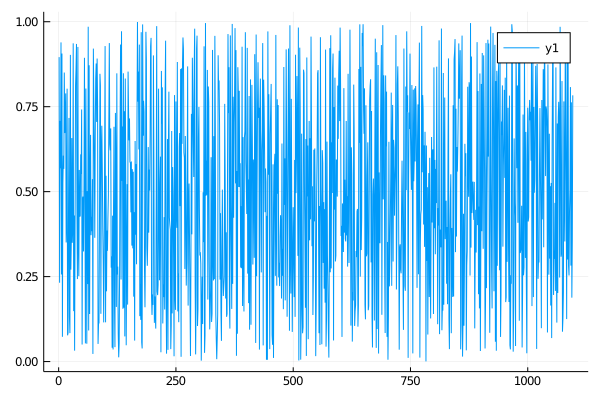

In [87]:
plot(gdf[("ABC",)].a)

In [88]:
# TODO: just set the first several window items to missing, don't check; loop from window:length(v)
function rolling(v, func, window::Int)
    out = Array{Union{Missing, eltype(v)}}(missing, length(v))
    @inbounds out = [
        i < window ? missing : func(v[(i - window + 1):i]) for i ∈ 1:length(v)
    ]
    out
end

rolling (generic function with 1 method)

In [31]:
@time df = @pipe df |>
    groupby(_, :grp) |>
    transform(_, :a => x -> rolling(x, mean, 2)) |>
    transform(_, :a_function => x -> rolling(x, sum, 10))

  0.466014 seconds (1.21 M allocations: 65.499 MiB, 4.64% gc time)


,grp,date,a,b,a_lag_5,b_lag_5,a_lag_20,b_lag_20,a_function,a_function_function
,String,Date,Float64,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,ABC,2010-01-01,0.811044,0.150737,missing,missing,missing,missing,missing,missing
2,ABC,2010-01-02,0.531626,0.84016,missing,missing,missing,missing,0.671335,missing
3,ABC,2010-01-03,0.42309,0.476784,missing,missing,missing,missing,0.477358,missing
4,ABC,2010-01-04,0.532906,0.809351,missing,missing,missing,missing,0.477998,missing
5,ABC,2010-01-05,0.119797,0.411185,missing,missing,missing,missing,0.326352,missing
6,ABC,2010-01-06,0.454326,0.0928866,0.811044,0.150737,missing,missing,0.287062,missing
7,ABC,2010-01-07,0.0395557,0.645526,0.531626,0.84016,missing,missing,0.246941,missing
8,ABC,2010-01-08,0.0970421,0.554127,0.42309,0.476784,missing,missing,0.0682989,missing
9,ABC,2010-01-09,0.194893,0.698999,0.532906,0.809351,missing,missing,0.145967,missing


In [17]:
v = rand(100);

In [19]:
rolling(v, sum, 10)

100-element Array{Union{Missing, Float64},1}:
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
 4.972102578157207
 4.287221307050983
 4.521511534190267
 4.684088098910518
 ⋮
 5.609486343063249
 5.738783711009059
 6.36620292803154
 6.139351646807158
 6.04559378343224
 5.697473592140744
 5.618537760710064
 5.821787608636212
 6.0617145873161355
 5.9644268389469906
 5.586805033631714
 5.553743686470451

In [106]:
df = @pipe df |>
    groupby(_, :grp) |>
    transform(_, :a => x-> mean(x)) |>
    rename(_, :a_function => Symbol("A_", 5))

,grp,date,a,b,A_function,b_function,A_5
,String,Date,Float64,Float64,Float64,Float64?,Float64
1,ABC,2018-01-01,0.668956,0.589302,0.494763,missing,0.494763
2,ABC,2018-01-02,0.197845,0.545656,0.494763,missing,0.494763
3,ABC,2018-01-03,0.356212,0.455758,0.494763,missing,0.494763
4,ABC,2018-01-04,0.0550304,0.905895,0.494763,missing,0.494763
5,ABC,2018-01-05,0.802318,0.288822,0.494763,missing,0.494763
6,ABC,2018-01-06,0.65957,0.193033,0.494763,missing,0.494763
7,ABC,2018-01-07,0.484042,0.724058,0.494763,missing,0.494763
8,ABC,2018-01-08,0.462483,0.760179,0.494763,missing,0.494763
9,ABC,2018-01-09,0.556326,0.450328,0.494763,missing,0.494763


In [104]:
?rename

search: rename rename! propertynames responsename



```
rename(df::AbstractDataFrame, vals::AbstractVector{Symbol};
       makeunique::Bool=false)
rename(df::AbstractDataFrame, vals::AbstractVector{<:AbstractString};
       makeunique::Bool=false)
rename(df::AbstractDataFrame, (from => to)::Pair...)
rename(df::AbstractDataFrame, d::AbstractDict)
rename(df::AbstractDataFrame, d::AbstractVector{<:Pair})
rename(f::Function, df::AbstractDataFrame)
```

Create a new data frame that is a copy of `df` with changed column names. Each name is changed at most once. Permutation of names is allowed.

# Arguments

  * `df` : the `AbstractDataFrame`
  * `d` : an `AbstractDict` or an `AbstractVector` of `Pair`s that maps the original names or column numbers to new names
  * `f` : a function which for each column takes the old name as a `String` and returns the new name that gets converted to a `Symbol`
  * `vals` : new column names as a vector of `Symbol`s or `AbstractString`s of the same length as the number of columns in `df`
  * `makeunique` : if `false` (the default), an error will be raised if duplicate names are found; if `true`, duplicate names will be suffixed with `_i` (`i` starting at 1 for the first duplicate).

If pairs are passed to `rename` (as positional arguments or in a dictionary or a vector) then:

  * `from` value can be a `Symbol`, an `AbstractString` or an `Integer`;
  * `to` value can be a `Symbol` or an `AbstractString`.

Mixing symbols and strings in `to` and `from` is not allowed.

See also: [`rename!`](@ref)

# Examples

```julia
julia> df = DataFrame(i = 1, x = 2, y = 3)
1×3 DataFrame
│ Row │ i     │ x     │ y     │
│     │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ 1     │ 2     │ 3     │

julia> rename(df, :i => :A, :x => :X)
1×3 DataFrame
│ Row │ A     │ X     │ y     │
│     │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ 1     │ 2     │ 3     │

julia> rename(df, :x => :y, :y => :x)
1×3 DataFrame
│ Row │ i     │ y     │ x     │
│     │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ 1     │ 2     │ 3     │

julia> rename(df, [1 => :A, 2 => :X])
1×3 DataFrame
│ Row │ A     │ X     │ y     │
│     │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ 1     │ 2     │ 3     │

julia> rename(df, Dict("i" => "A", "x" => "X"))
1×3 DataFrame
│ Row │ A     │ X     │ y     │
│     │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ 1     │ 2     │ 3     │

julia> rename(uppercase, df)
1×3 DataFrame
│ Row │ I     │ X     │ Y     │
│     │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ 1     │ 2     │ 3     │
```


In [86]:
df

,grp,date,a,b,a_function
,String,Date,Float64,Float64,Float64?
1,ABC,2018-01-01,0.668956,0.589302,missing
2,ABC,2018-01-02,0.197845,0.545656,missing
3,ABC,2018-01-03,0.356212,0.455758,missing
4,ABC,2018-01-04,0.0550304,0.905895,missing
5,ABC,2018-01-05,0.802318,0.288822,missing
6,ABC,2018-01-06,0.65957,0.193033,0.668956
7,ABC,2018-01-07,0.484042,0.724058,0.197845
8,ABC,2018-01-08,0.462483,0.760179,0.356212
9,ABC,2018-01-09,0.556326,0.450328,0.0550304


In [65]:
@pipe df |>
    groupby(_, :grp) |>
    transform(_, :a => x->lag(x, 5))

,grp,date,a,b,a_function
,String,Date,Float64,Float64,Float64?
1,ABC,2018-01-01,0.376983,0.514767,missing
2,ABC,2018-01-02,0.324507,0.21469,missing
3,ABC,2018-01-03,0.865411,0.225517,missing
4,ABC,2018-01-04,0.613528,0.749139,missing
5,ABC,2018-01-05,0.0494488,0.554568,missing
6,ABC,2018-01-06,0.214558,0.388373,0.376983
7,ABC,2018-01-07,0.313618,0.126448,0.324507
8,ABC,2018-01-08,0.715734,0.671444,0.865411
9,ABC,2018-01-09,0.627011,0.865726,0.613528


In [77]:
df

,date,grp,a,b
,Date,String,Float64,Float64
1,2018-01-01,ABC,0.668956,0.589302
2,2018-01-02,ABC,0.197845,0.545656
3,2018-01-03,ABC,0.356212,0.455758
4,2018-01-04,ABC,0.0550304,0.905895
5,2018-01-05,ABC,0.802318,0.288822
6,2018-01-06,ABC,0.65957,0.193033
7,2018-01-07,ABC,0.484042,0.724058
8,2018-01-08,ABC,0.462483,0.760179
9,2018-01-09,ABC,0.556326,0.450328
